<a href="https://colab.research.google.com/github/antaradas94/Waste-Classification/blob/main/waste_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import keras as k
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
cd '/content/drive/My Drive/recycling waste/'

/content/drive/My Drive/recycling waste


In [ ]:
import os
import cv2
from tqdm import tqdm
images=[]
labels=[]
DATADIR = '/content/drive/My Drive/recycling waste/'

CATEGORIES = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)
        try:
          img_array = cv2.resize(img_array, (224,224), interpolation = cv2.INTER_AREA)
          if img_array.shape == (224,224,3):
            images.append(img_array)
            labels.append(category)
        except:
          break
        


In [ ]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
#images = np.vstack(images)


In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(labels))}
target_dict

{'batteries': 0,
 'clothes': 1,
 'e-waste': 2,
 'glass': 3,
 'light blubs': 4,
 'metal': 5,
 'organic': 6,
 'paper': 7,
 'plastic': 8}

In [ ]:
label =  [target_dict[labels[i]] for i in range(len(labels))]

In [ ]:
label_ = np.asarray(label).reshape(8073,1) # labels are also converted to (1360,1)
label_.shape

(8073, 1)

In [ ]:

label_= tf.keras.utils.to_categorical(label_, 9)
label_

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50

In [ ]:
res = ResNet50(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [ ]:
from tensorflow.keras import layers

x = layers.Flatten()(res.output)

In [ ]:
prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = res.input, outputs=prediction)
model.summary()

In [ ]:

for layer in res.layers:
  layer.trainable = False



In [ ]:
from keras.callbacks import EarlyStopping
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)



In [ ]:
result = model.fit(x=images,y=label_, validation_split=0.3, batch_size= 32, epochs = 10, steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 375s 41s/step - loss: 1.2872 - accuracy: 0.9312 - val_loss: 186.2754 - val_accuracy: 0.2704
Epoch 2/10
10/10 [==============================] - 375s 41s/step - loss: 0.8080 - accuracy: 0.9563 - val_loss: 183.1013 - val_accuracy: 0.2936
Epoch 3/10
10/10 [==============================] - 376s 41s/step - loss: 1.2382 - accuracy: 0.9406 - val_loss: 190.0954 - val_accuracy: 0.2325
Epoch 4/10
10/10 [==============================] - 374s 41s/step - loss: 1.4147 - accuracy: 0.9219 - val_loss: 187.4646 - val_accuracy: 0.2399
Epoch 5/10
10/10 [==============================] - 375s 41s/step - loss: 0.7309 - accuracy: 0.9563 - val_loss: 186.8584 - val_accuracy: 0.2498
Epoch 6/10
10/10 [==============================] - 374s 41s/step - loss: 0.5596 - accuracy: 0.9750 - val_loss: 188.0360 - val_accuracy: 0.2457
Epoch 7/10
10/10 [==============================] - 374s 41s/step - loss: 0.3481 - accuracy: 0.9781 - val_loss: 187.6497 - val_accuracy:

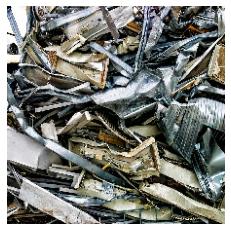

67.42 % the waste is paper


In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]


test_image = image.load_img('/content/metal.jpg', target_size = (224,224))
plt.axis("off")
plt.imshow(test_image)
plt.show()
 
test_image = image.img_to_array(test_image) / 255
test_image = np.expand_dims(test_image, axis=0)

predicted_array = model.predict(test_image)
#y_pred =  predicted_array.argmax(axis=-1)
#test_preds = model.predict(test_image)
#test_preds = tf.argmax(test_preds).numpy()
#num_correct = (test_preds == test_labels).sum()
predicted_value = output_class[np.argmax(predicted_array)]
predicted_accuracy = round(np.max(predicted_array) * 100, 2)

print(predicted_accuracy,'% the waste is', predicted_value)

In [ ]:
model.save('/content/garbage_model.h5')